In [13]:
# importing libraries
import pandas as pd
import numpy as np

In [14]:
df = pd.read_csv('coin_Bitcoin.csv')
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [15]:
# create n average column by averaging the high and low
df['avg'] = (df['High'] + df['Low']) / 2
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,avg
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09,140.744003
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09,140.489998
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09,123.805000
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09,108.940948
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09,93.613998


In [16]:
# dropping open and close columns
df.drop(['Open', 'Close','SNo','Name'], axis=1, inplace=True)
df.head()

,Symbol,Date,High,Low,Volume,Marketcap,avg
0,BTC,2013-04-29 23:59:59,147.488007,134.000000,0.0,1.603769e+09,140.744003
1,BTC,2013-04-30 23:59:59,146.929993,134.050003,0.0,1.542813e+09,140.489998
2,BTC,2013-05-01 23:59:59,139.889999,107.720001,0.0,1.298955e+09,123.805000
3,BTC,2013-05-02 23:59:59,125.599998,92.281898,0.0,1.168517e+09,108.940948
4,BTC,2013-05-03 23:59:59,108.127998,79.099998,0.0,1.085995e+09,93.613998


In [17]:
# convert date to long integer
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df.Date.values.astype(np.int64) // 10 ** 9
df.head()

,Symbol,Date,High,Low,Volume,Marketcap,avg
0,BTC,1367279999,147.488007,134.000000,0.0,1.603769e+09,140.744003
1,BTC,1367366399,146.929993,134.050003,0.0,1.542813e+09,140.489998
2,BTC,1367452799,139.889999,107.720001,0.0,1.298955e+09,123.805000
3,BTC,1367539199,125.599998,92.281898,0.0,1.168517e+09,108.940948
4,BTC,1367625599,108.127998,79.099998,0.0,1.085995e+09,93.613998


In [18]:
# applying label encoding to Symbol column
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Symbol'] = le.fit_transform(df['Symbol'])
df.head()

,Symbol,Date,High,Low,Volume,Marketcap,avg
0,0,1367279999,147.488007,134.000000,0.0,1.603769e+09,140.744003
1,0,1367366399,146.929993,134.050003,0.0,1.542813e+09,140.489998
2,0,1367452799,139.889999,107.720001,0.0,1.298955e+09,123.805000
3,0,1367539199,125.599998,92.281898,0.0,1.168517e+09,108.940948
4,0,1367625599,108.127998,79.099998,0.0,1.085995e+09,93.613998


In [19]:
# apply linear regression and find mean absolute error and mean squared error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

X = df.drop(['avg'], axis=1)
y = df['avg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))

Mean Absolute Error:  3.118823697598134e-07
Mean Squared Error:  3.5032437585051365e-13


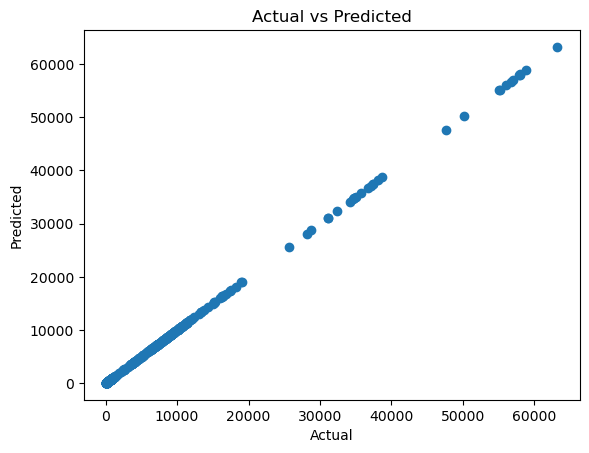

In [22]:
# plot the graph
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()